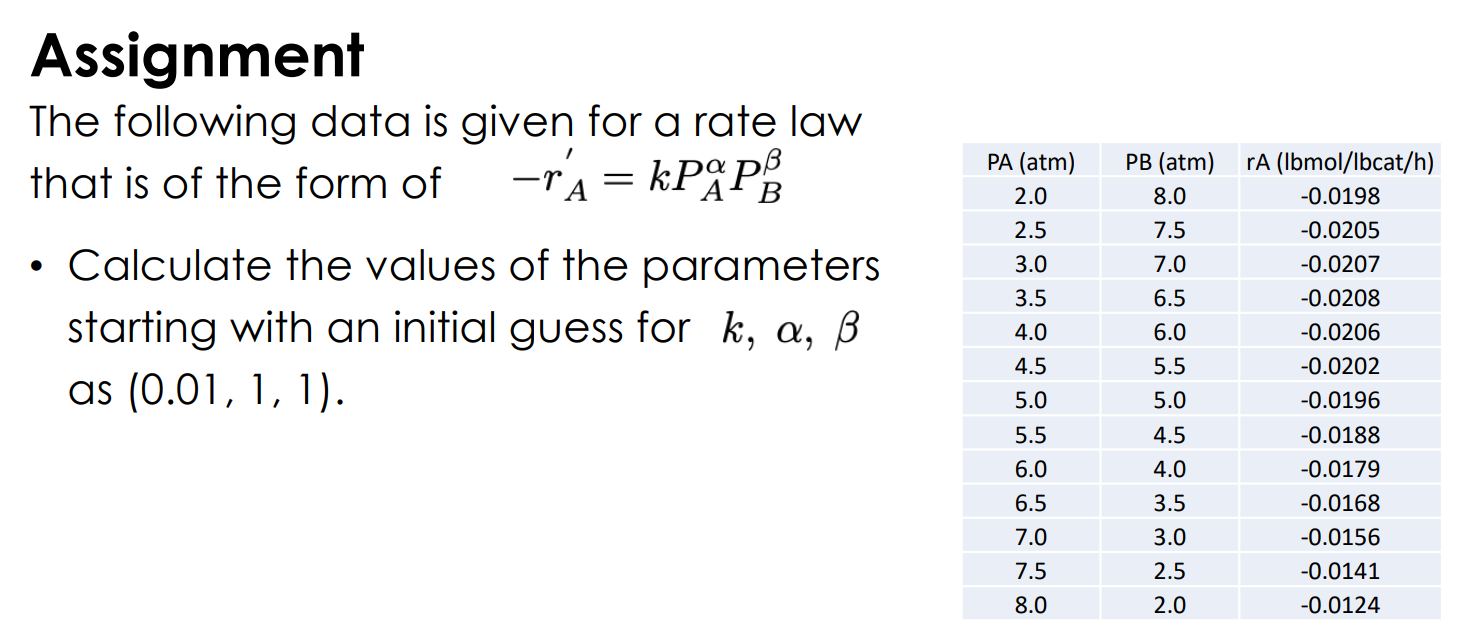

In [1]:
# Import Relevant Libraries

import numpy as np
from scipy.optimize import minimize
import pandas as pd

In [2]:
df = pd.read_csv('Rate_Law_Parameter_Data.csv')
df

,PA (atm),PB (atm),rA (lbmol/lbcat/h)
0,2.0,8.0,-0.0198
1,2.5,7.5,-0.0205
2,3.0,7.0,-0.0207
3,3.5,6.5,-0.0208
4,4.0,6.0,-0.0206
5,4.5,5.5,-0.0202
6,5.0,5.0,-0.0196
7,5.5,4.5,-0.0188
8,6.0,4.0,-0.0179
9,6.5,3.5,-0.0168


Knowing that the rate law is in the following form:

$$
-r_a = k P_a^\alpha P_b^\beta
$$

and we are just needing to solve for k, $\alpha$, and $\beta$, I can create an objective function to calculate the sum squared error given some guess of the model parameters

In [3]:
# objective function to minimize
def objective(p):
    df['Model'] = -p[0]*(df['PA (atm)']**p[1])*(df['PB (atm)']**p[2])
    df['SE'] = (df['Model'] - df['rA (lbmol/lbcat/h)'])**2
    SSE = sum(df['SE'])
    return SSE

Then we can use the minimize function to calculate what values of the model parameters give the smallest sum squared error.

In [4]:
# Set up minimize function
solution = minimize(objective, #objective function
                    [0.01,1,1]) # initial guess

In [5]:
solution.x

array([0.00391741, 0.33056979, 0.66986596])

This makes the best model roughly the following.

$$
-r_a = 0.004* P_a^{1/3} P_b^{2/3}
$$

Lastly, just verifying the model:

In [6]:
df['Best Model'] = -solution.x[0]*(df['PA (atm)']**solution.x[1])*(df['PB (atm)']**solution.x[2])

In [7]:
df

,PA (atm),PB (atm),rA (lbmol/lbcat/h),Model,SE,Best Model
0,2.0,8.0,-0.0198,-0.019836,1.313068e-09,-0.019836
1,2.5,7.5,-0.0205,-0.020451,2.379090e-09,-0.020451
2,3.0,7.0,-0.0207,-0.020741,1.654476e-09,-0.020741
3,3.5,6.5,-0.0208,-0.020768,1.025904e-09,-0.020768
4,4.0,6.0,-0.0206,-0.020572,7.787795e-10,-0.020572
5,4.5,5.5,-0.0202,-0.020178,4.910235e-10,-0.020178
6,5.0,5.0,-0.0196,-0.019601,5.966952e-13,-0.019601
7,5.5,4.5,-0.0188,-0.018850,2.472376e-09,-0.018850
8,6.0,4.0,-0.0179,-0.017928,7.829626e-10,-0.017928
9,6.5,3.5,-0.0168,-0.016834,1.125996e-09,-0.016834
